## [KNeighborsClassifier 주요 파라미터 설명]
* n_neighbors: 사용할 이웃의 수 (K값). 기본값은 5.
* weights: 이웃의 가중치 방식. 'uniform'은 동일 가중치, 'distance'는 가까운 이웃에 더 큰 가중치를 줌.
* algorithm: 이웃 탐색 알고리즘. 'auto', 'ball_tree', 'kd_tree', 'brute' 중 선택.
* p: 거리 측정 방식. p=1이면 맨해튼 거리, p=2이면 유클리드 거리. metric='minkowski'일 때 의미 있음.
* metric: 거리 계산 방식. 기본은 'minkowski'.
* leaf_size: KDTree, BallTree에서의 성능 관련 파라미터. 대개 기본값 사용.

## Iris 데이터로 KNN분류

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# IRIS 데이터셋 로드
iris = load_iris()

# 특성과 타겟 데이터 분할
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN 모델 초기화 및 파라미터 설정
# 현재 파라미터는 모두 기본값임
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", n_jobs=1)

# 모델 학습
knn.fit(X_train, y_train)

# 분류 결과 예측
y_pred = knn.predict(X_test)

# 분류 결과 평가
report = classification_report(y_test, y_pred)
print(report)
accu_score = accuracy_score(y_test, y_pred)
print(accu_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


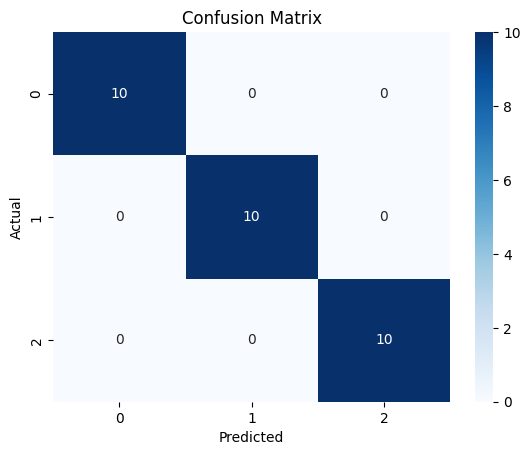

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 그리드 서치를 사용하여 최적 파라미터 값 찾기

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [1, 3, 5],  # 이웃의 수
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],  # 가중치 함수
}

# GridSearchCV를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# 최적 파라미터로 훈련된 모델 사용하여 예측
y_pred = grid_search.predict(X_test)

# 분류 결과 평가
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Breast Cancer 데이터로 Knn 분류

In [35]:
from sklearn.datasets import load_breast_cancer

# Beast Cancer 데이터넷 로드
breast_cancer = load_breast_cancer()

# 특성 데이터와 타겟 데이터
X = breast_cancer.data
y = breast_cancer.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN 모델 초기화
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
    n_jobs=None,
)

# 모델 학습
knn.fit(X_train, y_train)

# 분류 결과 예측
y_pred = knn.predict(X_test)

# 평가 리포트 출력
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## 해당 데이터 GridSearch 로 파라미터 최적화

In [40]:
param_grid = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
}

# GridSearchCV를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print(f"Best Parameters : {best_params}")

# 최적 파라미터로 훈련된 모델 사용하여 에측
y_pred = grid_search.predict(X_test)
# 분류 결과 평가
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Best Parameters : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

